# My own CNN with 100 pictures 

## Import Packages

In [395]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import listdir
from PIL import Image
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

# Load and transform the images into numpy arrays

## Set working directory

In [396]:
os.chdir('/Users/ngyduong/Documents/Machine Learning/Deep Learning/Image_manipulation')

## Import images

In [397]:
data = np.zeros(shape=(100,196,196))
i = 0
for filename in listdir('images'):
    if filename == ".DS_Store":
        pass
    else:
        image = Image.open('images/'+filename).convert('L')
        image = image.resize((196, 196))
        image = img_to_array(image)
        image = image.reshape((1,196,196))
        data[i] = image
        i+=1

## Get the label of all the images in the folder

In [398]:
folder = "/Users/ngyduong/Documents/Machine Learning/Deep Learning/Image_manipulation/images"
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

images = []
images_label = []
i = 0
for _file in onlyfiles:
    if _file == ".DS_Store":
        pass
    else:
        images.append(_file)
        label_in_file = _file.find("_")
        images_label.append(_file[0:label_in_file])
    
images_label = pd.Series(images_label).to_numpy()
    
print("There is {} images in the folder".format(len(onlyfiles)-1))
print('Among the {} in the folder there is {} images with the label bird'.format(len(images_label),(images_label == "bird").sum()))
print('Among the {} in the folder there is {} images with the label duong'.format(len(images_label),(images_label == "duong").sum()))

There is 100 images in the folder
Among the 100 in the folder there is 50 images with the label bird
Among the 100 in the folder there is 50 images with the label duong


# Data Manipulation

## Splitting the dataset

In [470]:
x_train, x_test, y_train, y_test = train_test_split(data, images_label, test_size=0.15, random_state=777)

In [471]:
print('x_train shape :', x_train.shape)
print('y_train shape :', y_train.shape)
print('x_test shape :', x_test.shape)
print('y_test shape :', y_test.shape)

x_train shape : (85, 196, 196)
y_train shape : (85,)
x_test shape : (15, 196, 196)
y_test shape : (15,)


In [472]:
print('Among the 90 images in the train set there is {} images with the label bird'.format((y_train == "bird").sum()))
print('Among the 90 images in the train set there is {} images with the label duong'.format((y_train == "duong").sum()))

Among the 90 images in the train set there is 42 images with the label bird
Among the 90 images in the train set there is 43 images with the label duong


In [473]:
print('Among the 90 images in the test set there is {} images with the label bird'.format((y_test == "bird").sum()))
print('Among the 90 images in the test set there is {} images with the label duong'.format((y_test == "duong").sum()))

Among the 90 images in the test set there is 8 images with the label bird
Among the 90 images in the test set there is 7 images with the label duong


## Plotting the data

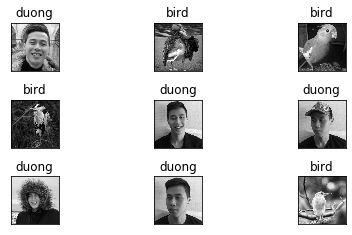

In [474]:
for i in range(9):
    plt.subplot(3,3,i+1) # we create 9 empty subplots 
    plt.imshow(x_train[i+3], cmap = 'gray') 
    plt.subplots_adjust(wspace = 2)
    plt.xticks([]) # remove x scales
    plt.yticks([]) # remove y scales
    plt.title("{}".format(y_train[i+3])) # Give titles to each subplots  

Text(0.5, 1.0, 'Pixel Value Distribution')

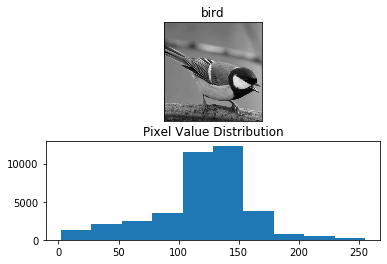

In [475]:
plt.subplot(2,1,1) 
plt.imshow(x_train[55], cmap='gray')
plt.title('{}'.format(y_train[55]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2) 
plt.hist(x_train[55].reshape(38416)) 
plt.title('Pixel Value Distribution')

## Transform the data

### Transform and normalize the data

In [476]:
x_train = x_train.reshape(85, 38416).astype('float32')
x_test = x_test.reshape(15, 38416).astype('float32')

In [477]:
for i in range(len(x_train)):
    x_train[i] /= (max(x_train[i])-min(x_train[i]))
    
for i in range(len(x_test)):
    x_test[i] /= (max(x_test[i])-min(x_test[i]))

### Get dummy variables

In [478]:
Y_train = pd.get_dummies(y_train)
Y_test = pd.get_dummies(y_test)

# Building the network

In [479]:
model = Sequential()

# First hidden layers of 500 node
model.add(Dense(500, input_shape=(38416,)))
model.add(Activation('relu')) # Rectified Linear Unit : max(x,0)
model.add(Dropout(0.2)) # 20% chance to set an activation node to 0 

# Second hidden layers of 50 node
model.add(Dense(50, input_shape=(500,)))
model.add(Activation('relu')) 
model.add(Dropout(0.2))

# Final visible layer with the 2 categorical variables 
model.add(Dense(2)) 
model.add(Activation('softmax')) 

## Training the model

### Compiling the sequential model

In [480]:
model.compile(loss = 'categorical_crossentropy', 
              metrics = ['accuracy'], optimizer = 'adam')

## Fit the model

In [481]:
model_fit = model.fit(x_train, Y_train, 
                      batch_size = 15, # number of samples for one update to the model weights
                      epochs = 10, # number of iteration
                      verbose = 2, 
                      validation_data = (x_test, Y_test))

Train on 85 samples, validate on 15 samples
Epoch 1/10
 - 1s - loss: 16.3241 - accuracy: 0.4706 - val_loss: 4.6401 - val_accuracy: 0.6000
Epoch 2/10
 - 1s - loss: 3.5333 - accuracy: 0.7059 - val_loss: 2.2181 - val_accuracy: 0.8667
Epoch 3/10
 - 1s - loss: 2.6001 - accuracy: 0.7529 - val_loss: 2.4242 - val_accuracy: 0.8667
Epoch 4/10
 - 1s - loss: 3.4726 - accuracy: 0.7412 - val_loss: 2.1498 - val_accuracy: 0.8667
Epoch 5/10
 - 1s - loss: 1.4796 - accuracy: 0.8353 - val_loss: 1.3141 - val_accuracy: 0.8667
Epoch 6/10
 - 1s - loss: 1.1706 - accuracy: 0.7765 - val_loss: 1.1382 - val_accuracy: 0.7333
Epoch 7/10
 - 1s - loss: 1.2021 - accuracy: 0.8000 - val_loss: 0.8796 - val_accuracy: 0.8667
Epoch 8/10
 - 1s - loss: 0.6977 - accuracy: 0.8235 - val_loss: 0.6960 - val_accuracy: 0.9333
Epoch 9/10
 - 1s - loss: 0.5220 - accuracy: 0.8118 - val_loss: 0.6816 - val_accuracy: 0.7333
Epoch 10/10
 - 1s - loss: 0.4083 - accuracy: 0.8941 - val_loss: 0.7985 - val_accuracy: 0.8667


## Plotting the metrics

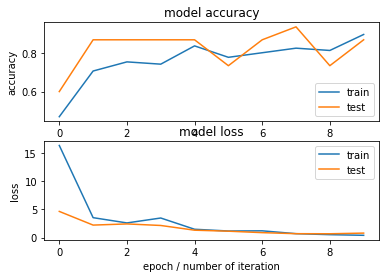

In [482]:
plt.subplot(2,1,1)
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch / number of iteration')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch / number of iteration')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper right')

## Save the model

In [483]:
model.save(os.path.join(os.getcwd(),'duong_CNN_model.h5'))

# Evaluate the model performance

## Load the model

In [484]:
duong_model = load_model('duong_CNN_model.h5')

## Get the loss and accuracy

In [485]:
loss_and_metrics = duong_model.evaluate(x_test, Y_test, 
                                        verbose=2)

print("The test loss is {}".format(loss_and_metrics[0]))
print("The test accuracy is {}".format(loss_and_metrics[1]))

The test loss is 0.7985391020774841
The test accuracy is 0.8666666746139526


## Transform y_test into binary variables

In [486]:
y_test_digit = np.zeros(shape=(15))
for i in range(15):
    if y_test[i] == 'bird':
        y_test_digit[i] = 0
    else:
        y_test_digit[i] = 1

In [487]:
print(y_test)
print(y_test_digit)

['bird' 'bird' 'duong' 'bird' 'bird' 'duong' 'duong' 'bird' 'duong' 'bird'
 'bird' 'bird' 'duong' 'duong' 'duong']
[0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.]


## Evaluate the correct and incorrect classification examples


In [488]:
predicted_classes = duong_model.predict_classes(x_test)

predicted_classes_string = np.zeros(shape=(15), dtype='object')
for i in range(15):
    if predicted_classes[i] == 0:
        predicted_classes_string[i] = 'bird'
    else:
        predicted_classes_string[i] = 'duong'

correct_indices = np.nonzero(predicted_classes == y_test_digit)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test_digit)[0]

print('classified correctly {}'.format(len(correct_indices)))
print('classified incorrectly {}'.format(len(incorrect_indices)))

classified correctly 13
classified incorrectly 2


### Plot 6 correct prediction

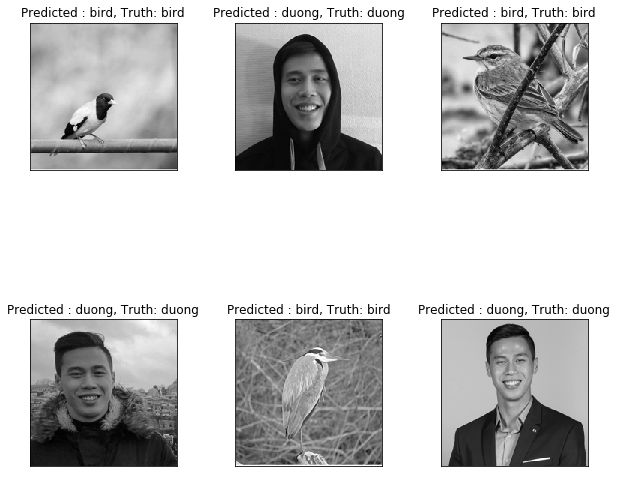

In [541]:
plt.figure(figsize=(10,10))

for i, correct in enumerate(correct_indices[[1,7,8,2,4,12]]):
    plt.subplot(2,3,i+1)
    plt.subplots_adjust(wspace = 0.4)
    plt.imshow(x_test[correct].reshape(196,196), cmap = 'gray')
    plt.title("Predicted : {}, Truth: {}".format(predicted_classes_string[correct],
                                                 y_test[correct]))
    plt.xticks([])
    plt.yticks([])

### Plot 2 incorrect prediction

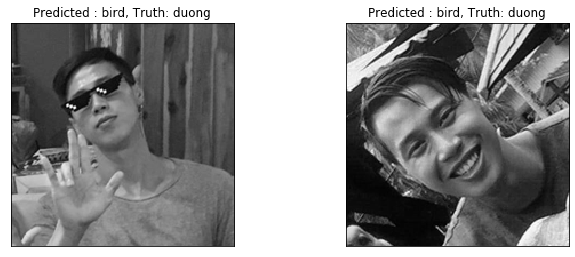

In [544]:
plt.figure(figsize=(10,5))

for j, incorrect in enumerate(incorrect_indices[:2]):
    plt.subplot(1,2,j+1)
    plt.subplots_adjust(wspace = 0.5)
    plt.imshow(x_test[incorrect].reshape(196,196), cmap = 'gray')
    plt.title("Predicted : {}, Truth: {}".format(predicted_classes_string[incorrect],
                                                 y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])